## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
full_data_df.sort_values('Drug Regimen')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
333,j119,Capomulin,Female,7,23,25,42.417166,1
296,b742,Capomulin,Male,7,21,30,39.167949,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
...,...,...,...,...,...,...,...,...
645,c264,Zoniferol,Female,11,27,35,61.074795,2
646,c264,Zoniferol,Female,11,27,40,65.708323,2
647,c264,Zoniferol,Female,11,27,45,67.942121,2
1249,n967,Zoniferol,Male,11,27,10,47.471723,1


In [33]:
# Checking the number of mice.
nu_of_mice = len(full_data_df["Mouse ID"].unique())
nu_of_mice

249

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned_full_data_df = full_data_df.drop_duplicates()
cleaned_full_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Optional: Get all the data for the duplicate mouse ID. 



In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [37]:
# Checking the number of mice in the clean DataFrame.
nu_of_mice = len(cleaned_full_data_df["Mouse ID"].unique())
nu_of_mice

249

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_by_drug_df = cleaned_full_data_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
sum_df = pd.DataFrame({"Mean": grouped_by_drug_df['Tumor Volume (mm3)'].mean(), 
                      "Median": grouped_by_drug_df['Tumor Volume (mm3)'].median(),
                      "Variance": grouped_by_drug_df['Tumor Volume (mm3)'].var(),
                      "Standard Deviation": grouped_by_drug_df['Tumor Volume (mm3)'].std(),
                      "SEM": grouped_by_drug_df["Tumor Volume (mm3)"].sem()})
sum_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

             Drug Regimen  Number of measurements
Drug Regimen                                     
Capomulin        Ramicane                     230
Ceftamin        Capomulin                     178
Infubinol       Infubinol                     178
Ketapril          Placebo                     188
Naftisol         Ceftamin                     186
Placebo          Stelasyn                     181
Propriva        Zoniferol                     160
Ramicane         Ketapril                     228
Stelasyn         Propriva                     181
Zoniferol        Naftisol                     182


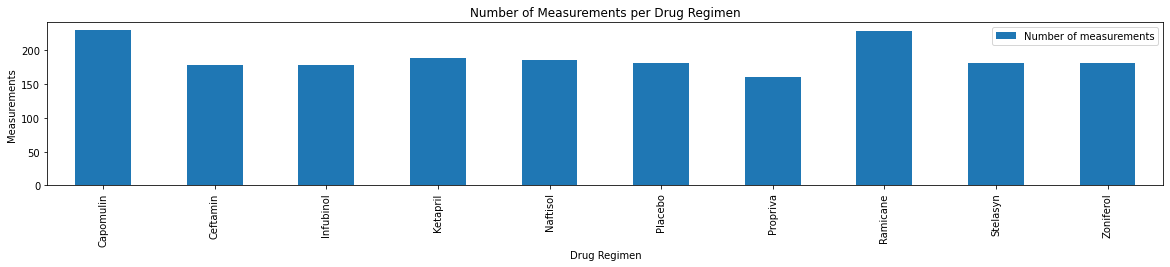

<Figure size 432x288 with 0 Axes>

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = grouped_by_drug_df['Tumor Volume (mm3)'].count()

regimen_count_df = pd.DataFrame({"Drug Regimen": cleaned_full_data_df['Drug Regimen'].unique(), 
                                 "Number of measurements": regimen_count})
print(regimen_count_df)

regimen_count_df.plot(kind="bar", figsize=(20,3))
plt.title("Number of Measurements per Drug Regimen")
plt.ylabel("Measurements")
plt.show()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x29c86c1a0f0>,
 [Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Naftisol')])

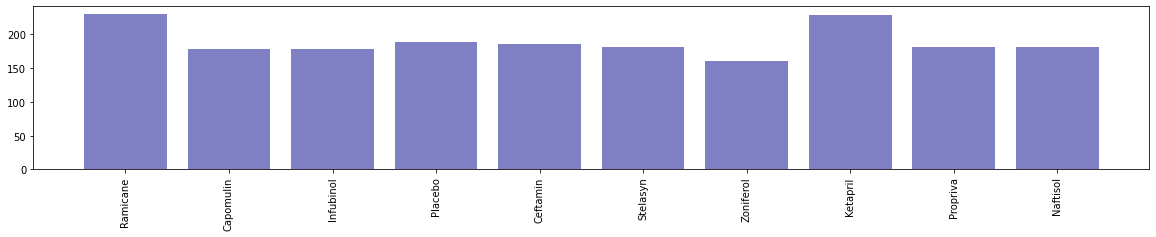

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(regimen_count_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, regimen_count_df['Number of measurements'], color="darkblue", alpha=0.5, align='center')
plt.xticks(tick_locations, regimen_count_df["Drug Regimen"], rotation="vertical")


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
